In [126]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings


In [79]:
sample = pd.read_csv('sample_submission.csv')
sample
test_df = pd.read_csv('test.csv')
test_df
train = pd.read_csv('train.csv')


In [80]:
date=train['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list[i]
        
        elif(i==1):
            month_+=list[i]
        elif(i==2):
            day_+=list[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
train_=train.drop(columns='date')
train_['year']=year
train_['month']=month
train_['day']=day
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


# 결측값 처리 . 
#결측값을 어디에서 어떤 식으로 했다.

In [81]:

def average(testdf):
    return testdf.mean()

train_.isnull().sum()
test_df.isnull().sum()

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64

In [82]:
#강수량 결측값 처리

In [83]:
train_precipitation=train_[['precipitation','month','humidity','sunshine_rate']]
test40=train_precipitation[(train_precipitation['humidity']<=40)&train_precipitation['precipitation'].notnull()]
test50=train_precipitation[(train_precipitation['humidity']<=50)&(train_precipitation['humidity']>40)&(train_precipitation['precipitation'].notnull())]
test60=train_precipitation[(train_precipitation['humidity']<=60)&(train_precipitation['humidity']>50)&( train_precipitation['precipitation'].notnull())]
test70=train_precipitation[(train_precipitation['humidity']<=70)&(train_precipitation['humidity']>60)&(train_precipitation['precipitation'].notnull())]
test80=train_precipitation[(train_precipitation['humidity']<=80)&(train_precipitation['humidity']>70)&train_precipitation['precipitation'].notnull()]
test90=train_precipitation[(train_precipitation['humidity']<=90)&(train_precipitation['humidity']>80)&train_precipitation['precipitation'].notnull()]
test100=train_precipitation[(train_precipitation['humidity']<=100)&(train_precipitation['humidity']>90)&train_precipitation['precipitation'].notnull()]

#test60
#test70
#test80
#test90
#test100
#test 40~100
#습도가 50이하인 데이터들

#**********40********
#습도가 40 이하인 데이터의 강수랑 평균값    
avr_pre40=average(test40['precipitation'])
#**********50********
#습도가 50 이하인 데이터의 강수랑 평균값    
avr_pre50=average(test50['precipitation'])    
#**********60********
#습도가 60 이하인 데이터의 강수랑 평균값    
avr_pre60=average(test60['precipitation'])
           
#**********70********
#습도가 70 이하인 데이터의 강수랑 평균값    
avr_pre70=average(test70['precipitation'])
           
#**********80********
#습도가 80 이하인 데이터의 강수랑 평균값    
avr_pre80=average(test80['precipitation'])
#**********90********
#습도가 90 이하인 데이터의 강수랑 평균값    
avr_pre90=average(test90['precipitation'])
#**********100********
#습도가 100 이하인 데이터의 강수랑 평균값    
avr_pre100=average(test100['precipitation'])
                                
avr_pre100

47.15121951219511

In [84]:

nan_precipitation=train_[train_['precipitation'].isnull()].index.tolist()
nan_precipitation

for i in nan_precipitation:
    test=train_.loc[i]
    if(test['humidity']<=40):
        train_.at[i,'precipitation']=avr_pre40      
    elif(test['humidity']<=50 and test['humidity']>40):
        train_.at[i,'precipitation']=avr_pre50
    elif(test['humidity']<=60 and test['humidity']>50):
        train_.at[i,'precipitation']=avr_pre60
    elif(test['humidity']<=70 and test['humidity']>60):
        train_.at[i,'precipitation']=avr_pre70      
    elif(test['humidity']<=80 and test['humidity']>70):
        train_.at[i,'precipitation']=avr_pre80
    elif(test['humidity']<=90 and test['humidity']>80):
        train_.at[i,'precipitation']=avr_pre90
    elif(test['humidity']<=100 and test['humidity']>90):
        train_.at[i,'precipitation']=avr_pre100
  
        

train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.366667,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.650000,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.650000,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.650000,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.650000,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,1.437705,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [85]:
date=test_df['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list[i]
        
        elif(i==1):
            month_+=list[i]
        elif(i==2):
            day_+=list[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
test_df=test_df.drop(columns='date')
test_df['year']=year
test_df['month']=month
test_df['day']=day
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,NaN,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1
1,NaN,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2
2,NaN,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


In [86]:
test_precipitation=test_df[['precipitation','month','humidity','sunshine_rate']]
test40=test_precipitation[(test_precipitation['humidity']<=40)&test_precipitation['precipitation'].notnull()]
test50=test_precipitation[(test_precipitation['humidity']<=50)&(test_precipitation['humidity']>40)&test_precipitation['precipitation'].notnull()]
test60=test_precipitation[(test_precipitation['humidity']<=60)&(test_precipitation['humidity']>50)&test_precipitation['precipitation'].notnull()]
test70=test_precipitation[(test_precipitation['humidity']<=70)&(test_precipitation['humidity']>60)&test_precipitation['precipitation'].notnull()]
test80=train_precipitation[(test_precipitation['humidity']<=80)&(test_precipitation['humidity']>70)&train_precipitation['precipitation'].notnull()]
test90=test_precipitation[(test_precipitation['humidity']<=90)&(test_precipitation['humidity']>80)&test_precipitation['precipitation'].notnull()]
test100=train_precipitation[(train_precipitation['humidity']<=100)&(test_precipitation['humidity']>90)&test_precipitation['precipitation'].notnull()]

#test60
#test70
#test80
#test90
#test100
#test 40~100
#습도가 50이하인 데이터들

#**********40********
#습도가 40 이하인 데이터의 강수랑 평균값    
avr_pre40=average(test40['precipitation'])
#**********50********
#습도가 50 이하인 데이터의 강수랑 평균값    
avr_pre50=average(test50['precipitation']) 
#**********60********
#습도가 60 이하인 데이터의 강수랑 평균값    
avr_pre60=average(test60['precipitation'])   
#**********70********
#습도가 70 이하인 데이터의 강수랑 평균값    
avr_pre70=average(test70['precipitation'])  
#**********80********
#습도가 80 이하인 데이터의 강수랑 평균값    
avr_pre80=average(test80['precipitation'])
#**********90********
#습도가 90 이하인 데이터의 강수랑 평균값    
avr_pre90=average(test90['precipitation'])     
#**********100********
#습도가 100 이하인 데이터의 강수랑 평균값    
avr_pre100=average(test100['precipitation'])
avr_pre100

24.425

In [87]:

nan_precipitation_=test_df[test_df['precipitation'].isnull()].index.tolist()
nan_precipitation_

for i in nan_precipitation_:
    temp=test_df.loc[i]
    if(temp['humidity']<=40):
        test_df.at[i,'precipitation']=avr_pre40
    elif(temp['humidity']<=50 and temp['humidity']>40):
        test_df.at[i,'precipitation']=avr_pre50
    elif(temp['humidity']<=60 and temp['humidity']>50):
        test_df.at[i,'precipitation']=avr_pre60
    elif(temp['humidity']<=70 and temp['humidity']>60):
        test_df.at[i,'precipitation']=avr_pre70
    elif(temp['humidity']<=80 and temp['humidity']>70):
        test_df.at[i,'precipitation']=avr_pre80
    elif(temp['humidity']<=90 and temp['humidity']>80):
        test_df.at[i,'precipitation']=avr_pre90
    elif(temp['humidity']<=100 and temp['humidity']>90):
        test_df.at[i,'precipitation']=avr_pre100



test_df


,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,1.794872,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1
1,0.000000,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2
2,0.000000,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3
3,0.000000,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4
4,0.000000,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,8.922581,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.200000,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.000000,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


In [88]:
#train_.isnull().sum()

In [89]:
#일조합은 모두 일조율이 모두 0.0 그래서 nan 값 0으로 교체
sun_sum=train_[train_['sunshine_sum'].isnull()].index.tolist()
sun_sum
for i in sun_sum:
    sun_sum=train_.loc[i]
    train_.at[i,'sunshine_sum']=0.0
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.366667,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.650000,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.650000,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.650000,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.650000,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,1.437705,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [90]:
#train_.isnull().sum()

In [91]:
#미세 먼지 결측값 처리
train_pm=train_[['PM10','PM2.5','month','sunshine_rate','sunshine_rate','wind_mean','wind_max']]


#******봄 미세먼지 평균****
spring_pm10=train_pm[(train_pm['PM10'].notnull())&(train_pm['month']>=3)&(train_pm['month']<=5)&(train_pm['PM10']!=0.0)]
spring_pm10_avr=average(spring_pm10['PM10'])

#******여름 미세먼지 평균****
summer_pm10=train_pm[(train_pm['PM10'].notnull())&(train_pm['month']>=6)&(train_pm['month']<=8)&(train_pm['PM10']!=0.0)]
summer_pm10_avr=average(summer_pm10['PM10'])
#******가을 미세먼지 평균****
fall_pm10=train_pm[(train_pm['PM10'].notnull())&(train_pm['month']>=9)&(train_pm['month']<=11)&(train_pm['PM10']!=0.0)]
fall_pm10_avr=average(fall_pm10['PM10'])

#******겨울 미세먼지 평균****
winter_pm10=train_pm[(train_pm['PM10'].notnull())&(train_pm['month']>=12)|(train_pm['month']<=2)&(train_pm['PM10']!=0.0)]
winter_pm10_avr=average(winter_pm10['PM10'])

winter_pm10_avr

46.20522388059702

In [92]:
nan_pm10=train_[train_['PM10'].isnull()].index.tolist()
nan_pm10

for i in nan_pm10:
    test=train_.loc[i]
    if(test['month']<=5 and test['month']>=3):
        train_.at[i,'PM10']=spring_pm10_avr
    elif(test['month']<=8 and test['month']>=6):
        train_.at[i,'PM10']=summer_pm10_avr
    elif(test['month']<=11 and test['month']>=9):
        train_.at[i,'PM10']=fall_pm10_avr
    elif(test['month']<=12 or test['month']>=2):
        train_.at[i,'PM10']=winter_pm10_avr
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.366667,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.650000,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.650000,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.650000,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.650000,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,1.437705,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [93]:
train_.isnull().sum()

precipitation     0
temp_mean         0
temp_highest      0
temp_lowest       0
PM10              0
PM2.5            68
humidity          0
sunshine_sum      0
sunshine_rate     0
wind_mean         0
wind_max          0
rental            0
year              0
month             0
day               0
dtype: int64

In [94]:
#초미세 먼지 결측값 처리
train_pm=train_[['PM10','PM2.5','month','sunshine_rate','sunshine_rate','wind_mean','wind_max']]


#******봄 미세먼지 평균****
spring_pm2=train_pm[(train_pm['PM2.5'].notnull())&(train_pm['month']>=3)&(train_pm['month']<=5)&(train_pm['PM10']!=0.0)]
spring_pm2_avr=spring_pm10['PM2.5'].mean()
spring_pm2_avr=round(spring_pm10_avr,1)
spring_pm2_avr

#******여름 미세먼지 평균****
summer_pm2=train_pm[(train_pm['PM2.5'].notnull())&(train_pm['month']>=6)&(train_pm['month']<=8)&(train_pm['PM10']!=0.0)]
summer_pm2_avr=summer_pm10['PM2.5'].mean()
summer_pm2_avr=round(summer_pm10_avr,1)
summer_pm2_avr

#******가을 미세먼지 평균****
fall_pm2=train_pm[(train_pm['PM2.5'].notnull())&(train_pm['month']>=9)&(train_pm['month']<=11)&(train_pm['PM10']!=0.0)]
fall_pm2_avr=fall_pm10['PM2.5'].mean()
fall_pm2_avr=round(fall_pm10_avr,1)
fall_pm2_avr

#******겨울 미세먼지 평균****
winter_pm2=train_pm[(train_pm['PM2.5'].notnull())&(train_pm['month']>=12)|(train_pm['month']<=2)&(train_pm['PM10']!=0.0)]
winter_pm2_avr=winter_pm10['PM2.5'].mean()
winter_pm2_avr=round(winter_pm10_avr,1)
winter_pm2_avr



46.2

In [95]:
nan_pm2=train_[train_['PM2.5'].isnull()].index.tolist()
nan_pm2

for i in nan_pm2:
    test=train_.loc[i]
    if(test['month']<=5 and test['month']>=3):
        train_.at[i,'PM2.5']=spring_pm2_avr
    elif(test['month']<=8 and test['month']>=6):
        train_.at[i,'PM2.5']=summer_pm2_avr
    elif(test['month']<=11 and test['month']>=9):
        train_.at[i,'PM2.5']=fall_pm2_avr
    elif(test['month']<=12 or test['month']>=2):
        train_.at[i,'PM2.5']=winter_pm2_avr
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.366667,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.650000,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.650000,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.650000,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.650000,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,1.437705,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [96]:
train_.isnull().sum()

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
year             0
month            0
day              0
dtype: int64

In [97]:

day = []

for i in range(0,614):
    if train_.index[i] % 7 == 0:
        day.append("Monday")
    elif train_.index[i] % 7 == 1:
        day.append("Tuesday")
    elif train_.index[i] % 7 ==2:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 3:
        day.append("Thursday")
    elif train_.index[i] % 7 == 4:
        day.append("Friday")
    elif train_.index[i] % 7 == 5:
        day.append("Saturday")
    elif train_.index[i] % 7 == 6:
        day.append("Sunday")
        
for i in range(0,len(train_.day)-614):
    if train_.index[i] % 7 == 0:
        day.append("Sunday")
    elif train_.index[i] % 7 == 1:
        day.append("Monday")
    elif train_.index[i] % 7 == 2:
        day.append("Tuesday")
    elif train_.index[i] % 7 == 3:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 4:
        day.append("Thursday")
    elif train_.index[i] % 7 == 5:
        day.append("Friday")
    elif train_.index[i] % 7 == 6:
        day.append("Saturday")

train_["day_name"] = day
#승원이 임무는 정리하자면, feature year, month_day 로 쪼개고 date 는 drop 하기. 
#결측값 처리 . 결측값을 어디에서 어떤 식으로 했다. 
#라고 정리도 해둬줘 그래야 우리도 같이 보고 피드백 하뉘까
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,day_name
0,0.366667,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1,Monday
1,0.650000,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2,Tuesday
2,0.650000,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3,Wednesday
3,0.650000,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4,Thursday
4,0.650000,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27,Sunday
1091,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28,Monday
1092,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29,Tuesday
1093,1.437705,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30,Wednesday


In [98]:
day2= []

for i in range(0,365):
    if test_df.index[i] % 7 == 0:
        day2.append("Friday")
    elif test_df.index[i] % 7 == 1:
        day2.append("Saturday")
    elif test_df.index[i] % 7 ==2:
        day2.append("Sunday")
    elif test_df.index[i] % 7 == 3:
        day2.append("Monsday")
    elif test_df.index[i] % 7 == 4:
        day2.append("Tuesday")
    elif test_df.index[i] % 7 == 5:
        day2.append("Wednesday")
    elif test_df.index[i] % 7 == 6:
        day2.append("Thursday")

test_df["day_name"] = day2
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,day_name
0,1.794872,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1,Friday
1,0.000000,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2,Saturday
2,0.000000,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3,Sunday
3,0.000000,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4,Monsday
4,0.000000,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27,Monsday
361,8.922581,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28,Tuesday
362,0.200000,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29,Wednesday
363,0.000000,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30,Thursday


In [111]:
train_ = pd.get_dummies(data = train_,columns = ['day_name'])
train_

,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_sum,...,month,day,discomfort_index,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.366667,-1.3,3.8,-5.1,-0.2,8.9,34.0,17.0,39.1,8.3,...,1,1,39.2,0,1,0,0,0,0,0
1,0.650000,-1.8,1.8,-4.3,-1.3,6.1,36.0,22.0,42.0,7.9,...,1,2,38.1,0,0,0,0,0,1,0
2,0.650000,-4.7,-0.4,-7.1,-4.8,6.7,31.0,19.0,42.3,8.6,...,1,3,34.5,0,0,0,0,0,0,1
3,0.650000,-4.7,-0.7,-8.7,-3.8,8.0,39.0,24.0,43.0,6.2,...,1,4,34.3,0,0,0,0,1,0,0
4,0.650000,-3.0,1.6,-5.6,-2.4,7.2,51.0,35.0,48.4,8.2,...,1,5,35.5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,6.8,8.6,70.0,42.0,62.9,5.9,...,12,27,45.6,0,0,0,1,0,0,0
1091,1.300000,6.7,11.4,4.2,8.1,7.2,66.0,44.0,72.1,8.0,...,12,28,46.2,0,1,0,0,0,0,0
1092,0.200000,0.1,4.3,-6.2,-0.3,10.5,69.0,46.0,70.8,0.0,...,12,29,36.3,0,0,0,0,0,1,0
1093,1.437705,-10.9,-6.2,-12.9,-13.3,6.7,39.0,15.0,55.5,8.3,...,12,30,23.5,0,0,0,0,0,0,1


In [112]:
test_df = pd.get_dummies(data = test_df,columns = ["day_name"])
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_sum,...,month,day,discomfort_index,day_name_Friday,day_name_Monsday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,1.794872,-4.2,1.6,-9.8,-4.1,8.9,30.0,17.0,64.0,6.5,...,1,1,31.1,1,0,0,0,0,0,0
1,0.000000,-5.0,-1.4,-8.4,-5.5,6.1,34.0,12.0,38.5,9.0,...,1,2,34.8,0,0,1,0,0,0,0
2,0.000000,-5.6,-2.0,-9.1,-5.5,6.7,39.0,14.0,45.0,5.5,...,1,3,32.8,0,0,0,1,0,0,0
3,0.000000,-3.5,0.3,-8.4,-2.9,8.0,40.0,23.0,51.4,4.6,...,1,4,34.3,0,1,0,0,0,0,0
4,0.000000,-5.5,-2.1,-9.9,-6.4,7.2,30.0,17.0,52.8,8.6,...,1,5,31.4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,-7.6,-3.9,-12.9,-7.3,6.0,33.0,20.0,60.9,3.8,...,12,27,26.9,0,1,0,0,0,0,0
361,8.922581,-4.1,-0.9,-8.5,-4.2,7.8,51.0,38.0,73.8,1.7,...,12,28,29.4,0,0,0,0,0,1,0
362,0.200000,0.4,5.9,-3.8,0.3,7.5,66.0,49.0,72.9,1.8,...,12,29,36.5,0,0,0,0,0,0,1
363,0.000000,-3.9,0.2,-6.8,-4.9,10.4,30.0,17.0,48.5,7.3,...,12,30,34.3,0,0,0,0,1,0,0


### 불쾌지수 열 추가

In [113]:
#0.81 * temp_df_t[i] +0.01 * temp_df_t[i]*((0.99*temp_df_t[i]) - 14.3)+ 46.3
#불쾌지수 공식(80이상 : 매우 불쾌, 80~75: 50%불쾌 , 68~75 :불쾌감 시작, 68미만: 쾌적함)
#discomfort_index
temp_df_t=train_['temp_mean'].tolist()
temp_df_h=train_['humidity'].tolist()
temp_df_t
temp_df_h

result_=[]
for i in range(len(temp_df_t)):
    result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
    result_.append(round(result,1))
result_
train_['discomfort_index']=result_

###체감온도 열 추가

In [114]:
#체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
#출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
temp_df_t=train_['temp_mean'].tolist()
temp_df_w=train_['wind_mean'].tolist()
temp_df_t
temp_df_w

result_=[]
for i in range(len(temp_df_t)):
    result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
    result_.append(round(result,1))
result_
train_.insert(4,'temp_sensible',result_)
train_
#일교차


ValueError: cannot insert temp_sensible, already exists

In [116]:
temp_df_t=test_df['temp_mean'].tolist()
temp_df_h=test_df['humidity'].tolist()
temp_df_t
temp_df_h

result_=[]
for i in range(len(temp_df_t)):
    result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
    result_.append(round(result,1))
result_
test_df['discomfort_index']=result_

In [117]:
#체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
#출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
temp_df_t=test_df['temp_mean'].tolist()
temp_df_w=test_df['wind_mean'].tolist()
temp_df_t
temp_df_w
result_=[]
for i in range(len(temp_df_t)):
    result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
    result_.append(round(result,1))
test_df.insert(4,'temp_sensible',result_)
train_.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
test_df.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])

#일교차


ValueError: cannot insert temp_sensible, already exists

In [165]:
#미세먼지 신호등

pm10=train_['PM10'].tolist()
pm2=train_['PM2.5'].tolist()
pm2
pm=[]

for i in range(len(pm2)):
    if(pm10[i]<=30 or pm2[i]<=15):
        pm.append(1)
    elif(pm10[i]<=80 and pm10[i]>=31 or pm2[i] >=16 and pm2[i]<=50):
        pm.append(2)
    elif(pm10[i]<=150 and pm10[i]>=81 or pm2[i]>=51 and pm2[i]<=100):
        pm.append(3)
    elif(pm10[i]>=150 or pm2[i]>=101):
        pm.append(4)

train_['pm']=pm

In [170]:
#미세먼지 신호등

pm10_=test_df['PM10'].tolist()
pm2_=test_df['PM2.5'].tolist()
pm=[]
for i in range(len(pm2_)):
    if(pm10_[i]<=30 or pm2_[i]<=15):
        pm.append(1)
    elif(pm10_[i]<=80 and pm10_[i]>=31 or pm2_[i] >=16 and pm2_[i]<=50):
        pm.append(2)
    elif(pm10_[i]<=150 and pm10_[i]>=81 or pm2_[i]>=51 and pm2_[i]<=100):
        pm.append(3)
    elif(pm10_[i]>=150 or pm2_[i]>=101):
        pm.append(4)

test_df['pm']=pm

,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_sum,...,day,discomfort_index,day_name_Friday,day_name_Monsday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,pm
0,1.794872,-4.2,1.6,-9.8,-4.1,8.9,30.0,17.0,64.0,6.5,...,1,31.1,1,0,0,0,0,0,0,1
1,0.000000,-5.0,-1.4,-8.4,-5.5,6.1,34.0,12.0,38.5,9.0,...,2,34.8,0,0,1,0,0,0,0,1
2,0.000000,-5.6,-2.0,-9.1,-5.5,6.7,39.0,14.0,45.0,5.5,...,3,32.8,0,0,0,1,0,0,0,1
3,0.000000,-3.5,0.3,-8.4,-2.9,8.0,40.0,23.0,51.4,4.6,...,4,34.3,0,1,0,0,0,0,0,2
4,0.000000,-5.5,-2.1,-9.9,-6.4,7.2,30.0,17.0,52.8,8.6,...,5,31.4,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,-7.6,-3.9,-12.9,-7.3,6.0,33.0,20.0,60.9,3.8,...,27,26.9,0,1,0,0,0,0,0,2
361,8.922581,-4.1,-0.9,-8.5,-4.2,7.8,51.0,38.0,73.8,1.7,...,28,29.4,0,0,0,0,0,1,0,2
362,0.200000,0.4,5.9,-3.8,0.3,7.5,66.0,49.0,72.9,1.8,...,29,36.5,0,0,0,0,0,0,1,2
363,0.000000,-3.9,0.2,-6.8,-4.9,10.4,30.0,17.0,48.5,7.3,...,30,34.3,0,0,0,0,1,0,0,1


<AxesSubplot:xlabel='date'>

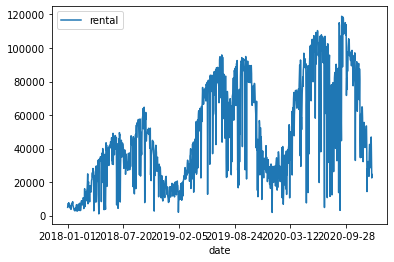

In [155]:
test_y=train[['rental','date']]
test_y.plot(x='date')

In [171]:
#pip install sklearn
#anaconda search -t conda xgboost
test_df=test_df.fillna(0)
test_df.info()
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precipitation       365 non-null    float64
 1   temp_mean           365 non-null    float64
 2   temp_highest        365 non-null    float64
 3   temp_lowest         365 non-null    float64
 4   temp_sensible       365 non-null    float64
 5   temp_diff           365 non-null    float64
 6   PM10                365 non-null    float64
 7   PM2.5               365 non-null    float64
 8   humidity            365 non-null    float64
 9   sunshine_sum        365 non-null    float64
 10  sunshine_rate       365 non-null    float64
 11  wind_mean           365 non-null    float64
 12  wind_max            365 non-null    float64
 13  year                365 non-null    int64  
 14  month               365 non-null    int64  
 15  day                 365 non-null    int64  
 16  discomfo

In [172]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

x = train_.drop('rental', axis = 1)
y = train_['rental']

In [173]:
model = XGBRegressor(max_depth = 4, n_estimators = 100)
model.fit(x,y)
pred = 1.2*model.predict(test_df)


In [174]:
pred = pred.astype(int)
pred


array([ 16833,  24444,  21714,  27892,  22872,  15467,  12118,  28125,
        23770,  19493,  20015,  17833,  28395,  27917,  19649,  20451,
        22779,  13926,  29042,  32819,  26360,  30523,  38977,  42416,
        48549,  29335,  36888,  17235,  30416,  31049,  29000,  23708,
        25710,  23521,  27984,  22576,  19247,  10438,  29708,  31130,
        24537,  40996,  36028,  57821,  33992,  20408,  16685,  14567,
        24692,  32209,  33458,  63007,  37890,  31930,  39394,  33551,
        74635,  73523,  37185,  25916,  39648,  35235,  46503,  70507,
        34153,  44498,  60262,  57487,  55949,  60861,  44742,  37326,
        44583,  43421,  48216,  71521,  75037,  68532,  41782,  31443,
        58245,  66695,  65718,  75228,  65769,  19365,  30292,  49089,
        75470, 100351, 101831,  94438,  32386,  83534,  89516,  96166,
        97911, 102692,  99023,  96101, 104353,  50255,  54349,  82113,
        94179,  64622,  62748,  76828,  90556,  90832,  99504,  97446,
      

In [175]:
sample['rental'] = pred
sample
sample.to_csv('4.csv',index=False)

<AxesSubplot:>

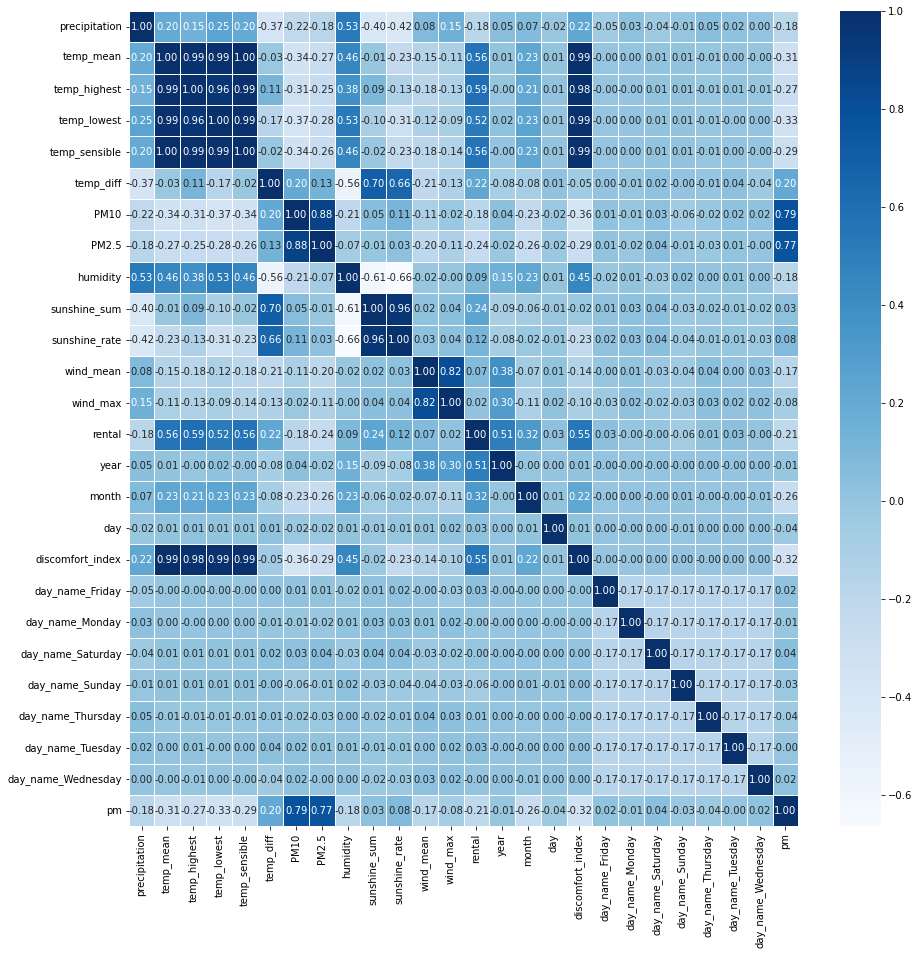

In [176]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')